<a href="https://colab.research.google.com/github/FrescoDev/simple-neural-network-demo/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network (demo)

A simplified NN put together to illustrate core ML concepts using core Python and NumPy

First, let's import NumPy in order to allow us to easily work with arrays and matrices.

In [2]:
import numpy as np


Let's define a simple neural network with:

- 2 input neurons
- 1 hidden layer with 3 neurons
- 1 output node with 1 neuron

This kind of looks like:

graphviz.svg

Each of the arrows represent a weight in the neural network 

Next, we define a class to represent our neural network. 

The main components will include:

- the nodes and the weights between the nodes, and the learning rate
- the train method is the main method that will be called to train the neural network
- the predict method will be called to make predictions
- the sigmoid method as the activation function that is applied to the signals

We'll start by defining the weight matrices. There are two we'll need to build to connect the three layers:

- Input -> Hidden
- Hidden -> Output

For the input to hidden weight matrix, this will look roughly like the following:

\begin{bmatrix}
   w_1 & w_2 & w_3 \\
   w_4 & w_5 & w_6
\end{bmatrix}

& the hidden to output weight matrix will look like:

\begin{bmatrix}
   w_1 \\
   w_2 \\
   w_3
\end{bmatrix}

In order to train the network, we'll go through the following process:

- Forward pass: which specifies how the input data is transformed by the model to produce the output predictions.
- Backward pass: which measures the difference between the predicted output and the true output and then update the model parameters based on the loss.



Let's initialise some mock training data as follows:


In [3]:
train_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_outputs = np.array([[0, 1, 1, 0]]).T

To break this down:

- The first column is the input for the first node
- The second column is the input for the second node
- We have 4 training examples (or classes) denoted by the number of rows
- The first row is the first training example
- The second row is the second training example
- The third row is the third training example
- The fourth row is the fourth training example

This looks like this in matrix form: 

\begin{bmatrix}
   0 & 0 \\
   0 & 1 \\
   1 & 0 \\
   1 & 1 \\
\end{bmatrix}

Where `(0,0)` would be our first training example, `(0,1)` our 2nd and so forth. 

A real world example of this could be a neural network that takes two inputs, height and weight, and outputs whether or not the person is overweight.

\begin{bmatrix}
   180 & 75 \\
   190 & 85 \\
   170 & 60 \\
   180 & 90 \\
\end{bmatrix}

Where 180 cm and 75 kg would be the first training example.

We also defined our predicted targets for each training example. This looks like:

\begin{bmatrix}
   0 \\
   1 \\
   1 \\
   0 \\
\end{bmatrix}

So this would mean that in our training data, sample class `(0,0)` has a predicted output of `0` and so forth. In our real world example, this could correspond to the set of binary classes in our overweight example (i.e. 1 would represent overweight, and 0 not overweight).

## Initialising the weight matrices

We'll use numpy's `np.random.normal` function to define a `(2,3)` matrix for the input to hidden layer weights - filled with random values that fit a normal distribution with mean `0` and standard deviation `1/sqrt(n)` where n is the number of input nodes.

This will produce a matrix with the following shape:

\begin{bmatrix}
   w_1 & w_2 & w_3 \\
   w_4 & w_5 & w_6
\end{bmatrix}

The matrix for the hidden to output layer weights uses the same method but with different dimensions, producing a weight matrix which looks like:

\begin{bmatrix}
   w_1 \\
   w_2 \\
   w_3
\end{bmatrix}

In [4]:
input_to_hidden_weight_matrix = np.random.normal(0.0, 2**-0.5,
                                                        (2, 3))
print(input_to_hidden_weight_matrix)

hidden_to_output_weight_matrix = np.random.normal(0.0, 3**-0.5,
                                                        (3, 1))

print(hidden_to_output_weight_matrix)

[[-0.16907713 -0.52980406 -0.40294388]
 [ 1.24127819 -0.23089244  1.16215273]]
[[-0.72198837]
 [-0.68314498]
 [ 0.21095515]]


## Training

First, we'll do a **forward pass** which specifies how the input data is transformed by the model to produce the output predictions.

In our model, we do this by calculating the signals into the hidden layer by multiplying the weights by the inputs and then apply the activation function to the signals.

This is simply matrix multiplication of the input matrix with our **input to hidden layer** weight matrix.

i.e. 

$\begin{bmatrix} x_1 & x_2 \\ x_3 & x_4 \\ x_5 & x_6 \\ x_7 & x_8 \end{bmatrix}\ \times \begin{bmatrix} w_1 & w_2 & w_3 \\ w_4 & w_5 & w_6 \end{bmatrix} = \begin{bmatrix} x_1w_1 + x_2w_4 & x_1w_2 + x_2w_5 & x_1w_3 + x_2w_6 \\ x_3w_1 + x_4w_4 & x_3w_2 + x_4w_5 & x_3w_3 + x_4w_6 \\ x_5w_1 + x_6w_4 & x_5w_2 + x_6w_5 & x_5w_3 + x_6w_6 \\ x_7w_1 + x_8w_4 & x_7w_2 + x_8w_5 & x_7w_3 + x_8w_6 \end{bmatrix}$

Then applying the activation function (sigmoid) to the results to get the full signal values.

We then do the same thing to get from our hidden layer values to our output layer. 

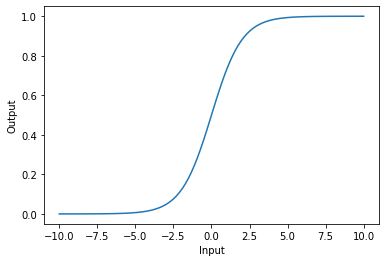

[[0.5        0.5        0.5       ]
 [0.77578642 0.44253197 0.76172366]
 [0.45783113 0.37056259 0.40060525]
 [0.74501527 0.31849507 0.68118194]]
[[0.35500994]
 [0.33142817]
 [0.37773175]
 [0.35165513]]


In [5]:
import matplotlib.pyplot as plt

# define the activation function (sigmoid)
def activation(x):
  return 1 / (1 + np.exp(-x))

# let's plot to visualise how this looks

# generate a range of input values
x = np.linspace(-10, 10, 100)

# compute the output of the neuron for each input
y = activation(x)

# plot the input-output curve
plt.plot(x, y)
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# forward pass to get hidden layer outputs (Inputs x Hidden layer Weights)
hidden_inputs = np.matmul(train_inputs, input_to_hidden_weight_matrix)
hidden_outputs = activation(hidden_inputs)

# propagate forward to get the final layer outputs (Hidden layer outputs x Final layer Weights)
final_inputs = np.matmul(hidden_outputs, hidden_to_output_weight_matrix)
final_outputs = activation(final_inputs)

print(hidden_outputs)
print(final_outputs)


Once we've done our forward pass and calcuated signals all the way across our layers into our output layer. We can do a **backward pass**.

This is where we calculate the **loss** (measures the difference between the predicted output and the true output) and then update the model parameters based on the loss value.





In [7]:
loss = final_outputs - train_outputs # how wrong was the model in its first pass
print(loss)

[[ 0.35500994]
 [-0.66857183]
 [-0.62226825]
 [ 0.35165513]]


We then update the weights using gradient descent / backpropagation. The weights are updated by multiplying the error by the inputs, then scaling by the learning rate (how quickly or slowly to update).

`output_errors * final_outputs * (1.0 - final_outputs)` is the gradient & the learning rate is the step size for the gradient descent.

So in full we get the updated weights to the hidden -> output layer by doing:

`updated_weights += learning_rate * (forward_pass_signal_outputs * gradient)`

which looks like this in our case:

`weights_hidden_to_output += learning_rate * np.matmul(hidden_outputs.T, output_errors * final_outputs * (1.0 - final_outputs))`

& similarly for the hidden -> input layer:

`weights_input_to_hidden += learning_rate * np.matmul(inputs_list.T, hidden_errors * hidden_outputs * (1.0 - hidden_outputs))`


## Putting this all together

See below for a class which combines the above to create a simple dumbed-down neural network applying the above components.

In [8]:
class NeuralNetwork():
    def __init__(self):
        print('Initialising the model')

        # number of nodes in the input, hidden and output layers
        self.input_nodes = 2
        self.hidden_nodes = 3
        self.output_nodes = 1

        # Defining the weights
        # This matrix has dimensions: (input_nodes, hidden_nodes) or (2,3)

        # We use a normal distribution with mean 0 and standard deviation 1/sqrt(n)
        # where n is the number of input nodes
        # the third argument is a tuple of the dimensions of the matrix
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5,
                                                        (self.input_nodes, self.hidden_nodes))

        # this is a 3x1 matrix (hidden_nodes, output_nodes)
        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                                         (self.hidden_nodes, self.output_nodes))

        # learning rate
        # this is the step size for the gradient descent or simply put the amount by which the weights are updated
        # value is typically between 0.1 and 0.001
        # if the value is too high, the weights will overshoot the minimum & if the value is too low, the weights will take a long time to converge
        self.lr = 0.1

    def train(self, inputs_list, targets_list):
        # Forward pass

        # calculate the signals into the hidden layer by multiplying the weights by the inputs
        # then apply the activation function to the signals
        # input_list is a 4x2 matrix and weights_input_to_hidden is a 2x3 matrix
        # so the result is a 4x3 matrix
        hidden_inputs = np.matmul(inputs_list, self.weights_input_to_hidden)
        hidden_outputs = self.sigmoid(hidden_inputs)

        # calculate the signals into the final output layer
        # multiply the hidden layer outputs by the weights
        # then apply the activation function
        # hidden_outputs is a 4x3 matrix and weights_hidden_to_output is a 3x1 matrix
        # so the result is a 4x1 matrix
        final_inputs = np.matmul(hidden_outputs, self.weights_hidden_to_output)
        final_outputs = self.sigmoid(final_inputs)

        # Backward pass

        # First, calculate the error

        # error is (target - actual)
        # to get the hidden layer error, we need to multiply the output error by the weights
        # hidden layer error is the output error, split by the weights, recombined at the hidden nodes
        # weights_hidden_to_output is a 3x1 matrix and output_errors is a 4x1 matrix
        # so the result is a 4x3 matrix
        output_errors = targets_list - final_outputs
        hidden_errors = np.matmul(
            output_errors, self.weights_hidden_to_output.T)

        # update the weights using gradient descent / backpropagation
        # the weights are updated by multiplying the error by the inputs, then scaling by the learning rate
        # output_errors * final_outputs * (1.0 - final_outputs) is the gradient & the learning rate is the step size for the gradient descent
        # the hidden to output weights are updated by multiplying the error by the hidden layer outputs
        # the input to hidden weights are updated by multiplying the error by the inputs
        # hidden_outputs is a 4x3 matrix and output_errors * final_outputs * (1.0 - final_outputs) is a 3x1 matrix
        # so we transpose the hidden_outputs matrix to make it a 3x4 matrix and then multiply it by the 4x1 matrix
        # so the result is a 3x1 matrix
        self.weights_hidden_to_output += self.lr * \
            np.matmul(hidden_outputs.T, output_errors *
                      final_outputs * (1.0 - final_outputs))

        # inputs_list is a 4x2 matrix and hidden_errors * hidden_outputs * (1.0 - hidden_outputs) is a 4x3 matrix
        # so we transpose the inputs_list matrix to make it a 2x4 matrix and then multiply it by the 4x3 matrix
        # so the result is a 2x3 matrix
        self.weights_input_to_hidden += self.lr * \
            np.matmul(inputs_list.T, hidden_errors *
                      hidden_outputs * (1.0 - hidden_outputs))

    def sigmoid(self, x):
        output = 1 / (1 + np.exp(-x))
        return output

    def predict(self, input):
        # to make a prediction, we need to forward pass the input through the network
        # the input is a 1x2 matrix and weights_input_to_hidden is a 2x3 matrix
        # so the result is a 1x3 matrix
        hidden_inputs = np.matmul(
            np.array(input), self.weights_input_to_hidden)

        # input is a 1x2 matrix and weights_input_to_hidden is a 2x3 matrix
        # so the result is a 1x3 matrix
        # calculate the signals into the hidden layer
        hidden_inputs = np.matmul(
            np.array(input), self.weights_input_to_hidden)

        # calculate the signals emerging from the hidden layer
        # we don't need to multiply by the weights because the weights are already in the hidden_inputs so we just apply the activation function
        hidden_outputs = self.sigmoid(hidden_inputs)

        # calculate the signals into the final output layer
        # hidden_outputs is a 1x3 matrix and weights_hidden_to_output is a 3x1 matrix
        # so the result is a 1x1 matrix
        final_inputs = np.matmul(hidden_outputs, self.weights_hidden_to_output)
        final_outputs = self.sigmoid(final_inputs)

        return final_outputs

Let's first initialise how customer simplified neural network

In [9]:
model = NeuralNetwork()

Initialising the model


Let's now train it based on our fake training data

In [12]:
for epoch in range(10):
    model.train(train_inputs, train_outputs)

And finally use our trained model to make a prediction based on a class with data: `(1,0)`

In [13]:
print(model.predict([1,0]))

[0.53795434]
